In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd '/Users/rajeshprabhakarkaila/Desktop/Datasets'

/Users/rajeshprabhakarkaila/Desktop/Datasets


In [3]:
adspend=pd.read_csv("Sample Media Spend Data.csv")

In [5]:
numcols=adspend.select_dtypes(include=np.number)

In [7]:
# Logarthmic Transformation
log_numcols=np.log(numcols)

In [8]:
log_numcols.head()

,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Overall_Views,Sales
0,5.971262,6.045005,6.011267,12.765388,11.206129,9.398644,6.525030,10.992336
1,6.668228,6.806829,4.700480,13.134826,9.376194,9.158942,6.748760,10.947397
2,4.394449,6.877296,6.609349,12.971639,10.863451,9.743788,6.632002,10.793742
3,3.218876,6.354370,4.174387,12.942628,11.272636,9.230829,6.848005,11.185074
4,6.336826,5.648974,5.686975,12.920261,10.610562,8.671458,6.489205,10.937295


In [9]:
# lag of all variables 
lagvars=numcols.drop('Sales',axis=1)

In [10]:
lagvars.shape

(3051, 7)

In [14]:
lagvar=lagvars.shift(-1)

In [16]:
lagvar.shape

(3051, 7)

In [17]:
adspend_df=pd.concat([log_numcols,lagvar],axis=1)

In [18]:
adspend_df.shape

(3051, 15)

In [20]:
import seaborn as sns

<Axes: >

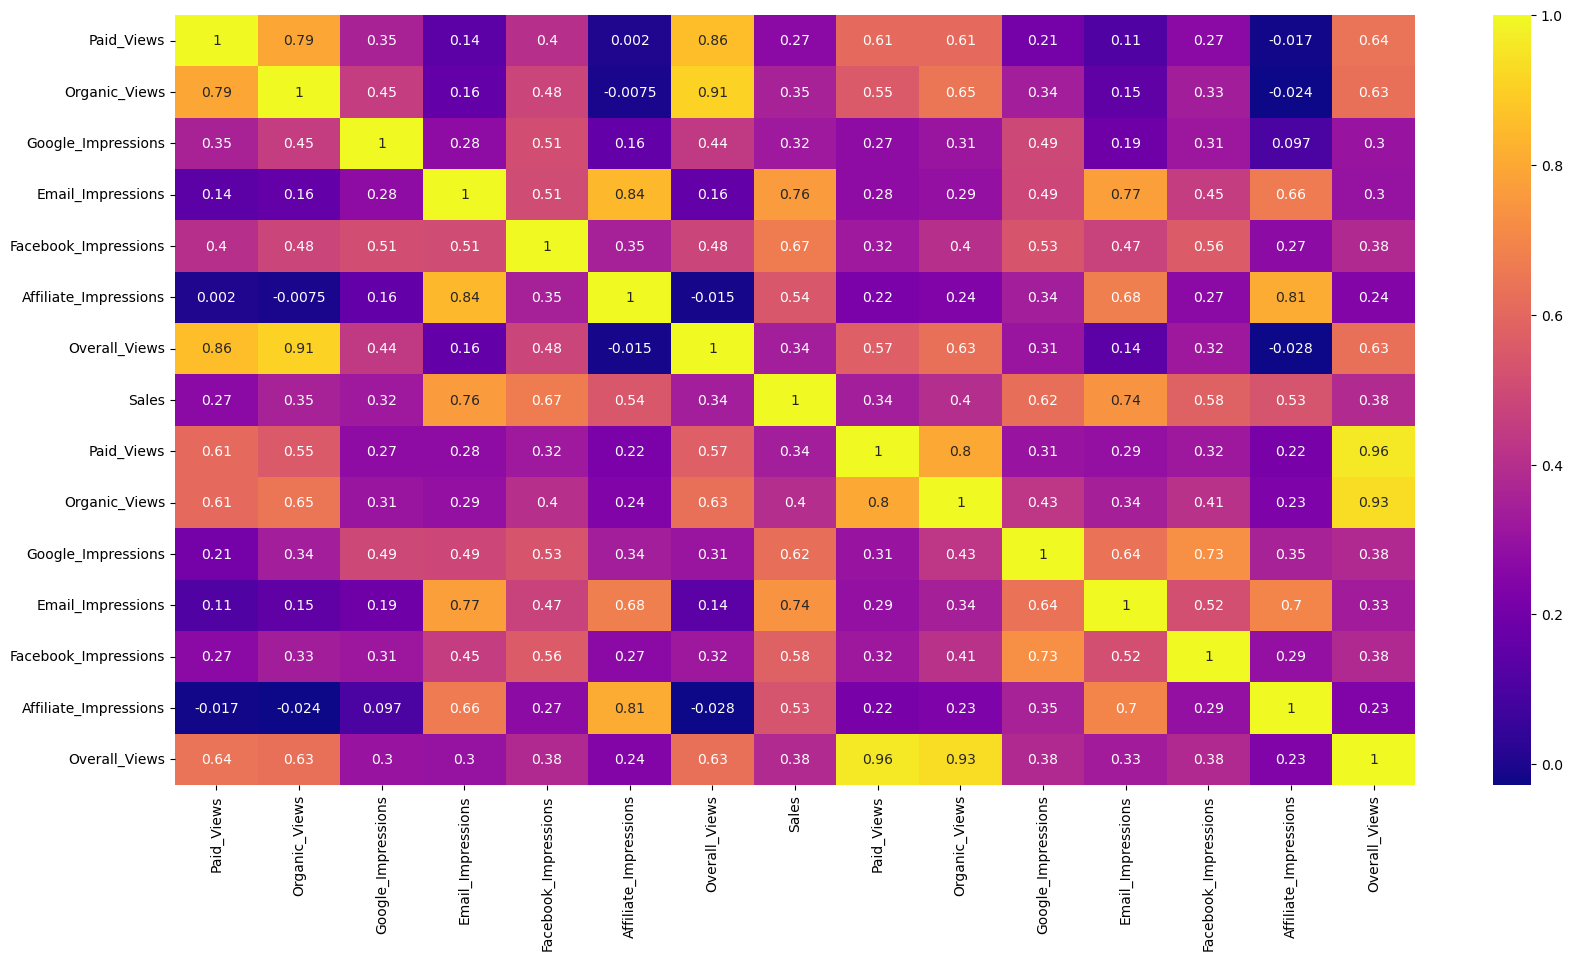

In [22]:
# Find Multicollinearity
plt.figure(figsize=(20,10))
sns.heatmap(adspend_df.corr(),annot=True,cmap='plasma')

In [23]:
adspend_df.columns

Index(['Paid_Views', 'Organic_Views', 'Google_Impressions',
       'Email_Impressions', 'Facebook_Impressions', 'Affiliate_Impressions',
       'Overall_Views', 'Sales', 'Paid_Views', 'Organic_Views',
       'Google_Impressions', 'Email_Impressions', 'Facebook_Impressions',
       'Affiliate_Impressions', 'Overall_Views'],
      dtype='object')

In [24]:
# Build Regression Model with Log Variables
import statsmodels.formula.api as sm

In [27]:
ad_reg_log=sm.ols(formula='Sales~Paid_Views+Google_Impressions+Email_Impressions+Facebook_Impressions+Affiliate_Impressions+Overall_Views',
                 data=numcols).fit()
# Variables used in formula
# 'Paid_Views','Google_Impressions','Email_Impressions', 
# 'Facebook_Impressions', 'Affiliate_Impressions','Overall_Views'

In [28]:
ad_reg_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     1720.
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:14:00   Log-Likelihood:                -39768.
No. Observations:                3051   AIC:                         7.955e+04
Df Residuals:                    3044   BIC:                         7.959e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -9632.6933   3242.621     -2.971      0.003    -1.6e+04   -3274.746
Paid_Views               -0.5564      0.241     -2.313      0.021      -1.028      -0.085
Google_Impressions        0.0479      0.002     19.325      0.000       0.043       0.053
Email_Impressions         0.1624      0.006     29.357      0.000       0.152       0.173
Facebook_Impressions      0.1684      0.006     26.325      0.000       0.156       0.181
Affiliate_Impressions    -0.6391      0.132     -4.858      0.000      -0.897      -0.381
Overall_Views             0.2615      0.147      1.784      0.075      -0.026       0.549
==============================================================================
Omnibus:                     2353.934   Durbin-Watson:                   0.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           238038.322
Skew:                           2.955   Prob(JB):                         0.00
Kurtosis:                      45.867   Cond. No.                     3.00e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
ad_reg_log_interact=sm.ols(formula='Sales~Paid_Views+Google_Impressions+Email_Impressions+Facebook_Impressions+Affiliate_Impressions+Overall_Views+Paid_Views*Google_Impressions+Email_Impressions*Affiliate_Impressions+Facebook_Impressions*Google_Impressions',
                 data=numcols).fit()

# Intercation Variables
# Paid_Views*Google_Impressions+Email_Impressions*Affiliate_Impressions+
# Facebook_Impressions*Google_Impressions

In [30]:
ad_reg_log_interact.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     1184.
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:21:54   Log-Likelihood:                -39729.
No. Observations:                3051   AIC:                         7.948e+04
Df Residuals:                    3041   BIC:                         7.954e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                1.107e+04   4802.730      2.304      0.021    1649.797    2.05e+04
Paid_Views                                  0.0284      0.257      0.111      0.912      -0.476       0.533
Google_Impressions                          0.0469      0.003     16.937      0.000       0.042       0.052
Email_Impressions                           0.1349      0.007     18.543      0.000       0.121       0.149
Facebook_Impressions                        0.1435      0.008     18.418      0.000       0.128       0.159
Affiliate_Impressions                      -1.5013      0.195     -7.707      0.000      -1.883      -1.119
Overall_Views                               0.2407      0.145      1.662      0.097      -0.043       0.525
Paid_Views:Google_Impressions           -2.075e-07   4.16e-08     -4.984      0.000   -2.89e-07   -1.26e-07
Email_Impressions:Affiliate_Impressions  7.836e-07   1.22e-07      6.409      0.000    5.44e-07    1.02e-06
Facebook_Impressions:Google_Impressions  5.208e-09      1e-09      5.188      0.000    3.24e-09    7.18e-09
==============================================================================
Omnibus:                     2259.313   Durbin-Watson:                   0.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           209892.849
Skew:                           2.786   Prob(JB):                         0.00
Kurtosis:                      43.250   Cond. No.                     9.58e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.58e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
lagvar['Sales']=adspend.Sales

In [34]:
ad_reg_lag=sm.ols(formula='Sales~Paid_Views+Google_Impressions+Email_Impressions+Facebook_Impressions+Affiliate_Impressions+Overall_Views',
                 data=lagvar).fit()

In [35]:
ad_reg_lag.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     860.7
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:31:50   Log-Likelihood:                -40499.
No. Observations:                3050   AIC:                         8.101e+04
Df Residuals:                    3043   BIC:                         8.105e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -4741.0018   4138.910     -1.145      0.252   -1.29e+04    3374.340
Paid_Views               -0.4244      0.307     -1.383      0.167      -1.026       0.177
Google_Impressions        0.0199      0.003      6.282      0.000       0.014       0.026
Email_Impressions         0.1854      0.007     26.255      0.000       0.172       0.199
Facebook_Impressions      0.1594      0.008     19.536      0.000       0.143       0.175
Affiliate_Impressions    -0.6811      0.168     -4.058      0.000      -1.010      -0.352
Overall_Views             0.3984      0.187      2.130      0.033       0.032       0.765
==============================================================================
Omnibus:                     3369.765   Durbin-Watson:                   0.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           582047.053
Skew:                           5.295   Prob(JB):                         0.00
Kurtosis:                      69.842   Cond. No.                     3.00e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
ad_reg_lag_interact=sm.ols(formula='Sales~Paid_Views+Google_Impressions+Email_Impressions+Facebook_Impressions+Affiliate_Impressions+Overall_Views+Paid_Views*Google_Impressions+Email_Impressions*Affiliate_Impressions+Facebook_Impressions*Google_Impressions',
                 data=lagvar).fit()

In [37]:
ad_reg_lag_interact.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     585.9
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:36:11   Log-Likelihood:                -40478.
No. Observations:                3050   AIC:                         8.098e+04
Df Residuals:                    3040   BIC:                         8.104e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                9609.0963   6165.734      1.558      0.119   -2480.333    2.17e+04
Paid_Views                                 -0.3282      0.330     -0.994      0.321      -0.976       0.319
Google_Impressions                          0.0288      0.004      8.095      0.000       0.022       0.036
Email_Impressions                           0.1545      0.009     16.543      0.000       0.136       0.173
Facebook_Impressions                        0.1841      0.010     18.411      0.000       0.164       0.204
Affiliate_Impressions                      -1.5927      0.250     -6.370      0.000      -2.083      -1.102
Overall_Views                               0.3983      0.186      2.143      0.032       0.034       0.763
Paid_Views:Google_Impressions           -6.933e-08   5.34e-08     -1.297      0.195   -1.74e-07    3.54e-08
Email_Impressions:Affiliate_Impressions  7.362e-07   1.57e-07      4.691      0.000    4.28e-07    1.04e-06
Facebook_Impressions:Google_Impressions -5.609e-09   1.29e-09     -4.353      0.000   -8.14e-09   -3.08e-09
==============================================================================
Omnibus:                     3331.871   Durbin-Watson:                   0.728
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           565304.289
Skew:                           5.192   Prob(JB):                         0.00
Kurtosis:                      68.882   Cond. No.                     9.58e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.58e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
sales_lag_pred=ad_reg_lag.predict()

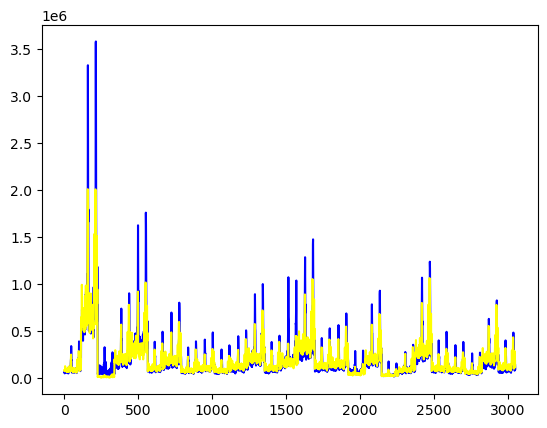

In [42]:
plt.plot(lagvar.Sales,color='blue')
plt.plot(sales_lag_pred,color='yellow')
plt.show()

In [43]:
sales_log_pred=ad_reg_log.predict()

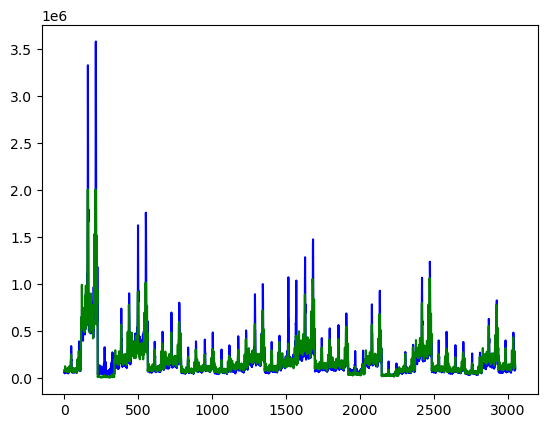

In [45]:
plt.plot(numcols.Sales,color="blue")
plt.plot(sales_log_pred,color="green")
plt.show()